# MOLD DETECTOR

## Move all images from different folders into a Fresh and Rotten folders

In [ ]:
path = '/Users/kenlam/Desktop/Data science/ML projects/project7/mold_detector/Data/'
os.chdir(path)
os.getcwd()

In [ ]:
import os
import shutil 
import re

# Define folders and master folders
path = '/Users/kenlam/Desktop/Data science/ML projects/project7/mold_detector/Data/'
# os.mkdir(os.path.join("Zips"))

source_folders = os.listdir(path)
filtered_folders = []
PATTERN = r"\.zip$"
FILTER_NAMES = [".DS_Store", "Rotten", "Other", "Fresh", "Zips"]
# os.mkdir(os.path.join("Rotten"))

for folder in source_folders:
    if not re.search(PATTERN, folder) and folder not in FILTER_NAMES : 
        filtered_folders.append(folder)
    elif folder not in FILTER_NAMES:
        shutil.move(os.path.join(folder), os.path.join("Zips", folder))

In [ ]:
def append_images(folder_list=[], filter_names=FILTER_NAMES, dir_name=None):
    # Create a new folder
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)
    # Loop through the folders and append all to the master folder
    for folder in folder_list:
        if os.path.isdir(folder):  # Check if the folder is actually a directory
            for file in os.listdir(folder):
                if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
                    try:
                        shutil.move(os.path.join(folder, file), os.path.join(dir_name, file))
                        print(f"Move image: {file} to filtered images")
                    except Exception as e:
                        print(f"Error moving image {file}: {e}")
    print("Sorting completed!")

In [ ]:
folder_list = os.listdir(path)
folder_list_filtered = []
for folder in folder_list:
    if folder not in FILTER_NAMES:
        folder_list_filtered.append(folder)
print(folder_list_filtered)

In [ ]:
append_images(folder_list_filtered, FILTER_NAMES, dir_name="Fresh")

In [ ]:
# Put the rest of the files as Other 
# os.mkdir("Other")
source_folders = os.listdir('/Users/kenlam/Desktop/Data science/ML projects/project7/mold_detector/Data/')
for folder in source_folders:
    if folder not in ["Rotten", "Zips", "Fresh"]:
        try:
            shutil.move(folder, "Other")
            print(f"Moving {folder} into Other")
        except Exception as e:
            print("Error in moving {folder}: {e}")
print("Cleaning completed!")


In [ ]:
import os
# Checks the length of the file
print(f"The Rotten folder has {len(os.listdir('Rotten'))}")
print(f"The Fresh folder has {len(os.listdir('Fresh'))}")

Now that we have our data collected, let's split them up into training and testing.

First we need to create sub directories containing training and validation for fresh and rotten food images

In [ ]:
root_dir = './mold_detector'



def create_train_val_dir(root_dir):
    train = os.path.join(root_dir, "Train")
    fresh_train = os.path.join(train, "Fresh")
    rotten_train = os.path.join(train, "Rotten")
    val = os.path.join(root_dir, "Val")
    fresh_val = os.path.join(val, "Fresh")
    rotten_val = os.path.join(val, "Rotten")

    os.mkdir(train)
    os.mkdir(fresh_train)
    os.mkdir(rotten_train)
    os.mkdir(val)
    os.mkdir(fresh_val)
    os.mkdir(rotten_val)

try:
    create_train_val_dir(root_dir)
except FileExistsError:
    print("Fail to create sub directories")


In [ ]:
import os
import shutil

def remove_files(directory):
    """Remove all files in the directory."""
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            os.remove(file_path)

def remove_train_val_files(train_dir, val_dir):
    """Remove all files in the train and val directories."""
    # Remove files in the train directory
    for category in ['Fresh', 'Rotten']:
        remove_files(os.path.join(train_dir, category))
    
    # Remove files in the val directory
    for category in ['Fresh', 'Rotten']:
        remove_files(os.path.join(val_dir, category))

# Example usage:
train_dir = './Train/Train/'
val_dir = './Val/'
remove_train_val_files(train_dir, val_dir)


Now, we can start splitting the data into the appropriate sub directories

In [ ]:
import random
from shutil import copyfile
from PIL import Image
SOURCE_DIR = './Data'
def train_val_split(split_size=0.2, train_dir=None, val_dir=None, source_dir=SOURCE_DIR):
    # Append all of the files from both subdirectories 
    original_data = os.listdir('./Data/Fresh') + os.listdir('./Data/Rotten')
    # Shuffle them randomly
    original_data_shuffled = random.sample(original_data, len(original_data))
    
    # Calculate split index
    split_index = int(split_size * len(original_data_shuffled))

    # Split into train and val
    train = original_data_shuffled[:split_index]
    val = original_data_shuffled[split_index:]

    # Copy files into the appropriate directories
    for file in train:
        try:
            if os.path.exists(os.path.join(source_dir, file)):
                img = Image.open(os.path.join(source_dir, file))
                # Get rid of transparency
                if img.mode == "P" and "transparency" in img.info:
                    img = img.convert("RGBA")
                img.save(os.path.join(train_dir, file))  # Save the image without transparency
                print(f"Copied {file} to {train_dir}")
            else:
                print(f"File not found: {os.path.join(source_dir, file)}")
        except Exception as e:
            print(f"Error copying {file} to {train_dir}: {e}")
    
    for file in val:
        try:
            if os.path.exists(os.path.join(source_dir, file)):
                img = Image.open(os.path.join(source_dir, file))
                # Convert the image to RGB format to remove transparency
                if img.mode == "P" and "transparency" in img.info:
                    img = img.convert("RGBA")
                img.save(os.path.join(val_dir, file))  # Save the image without transparency
                print(f"Copied {file} to {val_dir}")
            else:
                print(f"File not found: {os.path.join(source_dir, file)}")
        except Exception as e:
            print(f"Error copying {file} into {val_dir}: {e}")

In [ ]:
import os
# Fresh and Rotten source directories
FRESH_SOURCE_DIR = "./Data/Fresh/"
ROTTEN_SOURCE_DIR = "./Data/Rotten/"

# Train and validation
TRAIN_DIR = "./Train/Train"
VAL_DIR = "./Val/"

# Fresh and rotten subdirectories
TRAIN_FRESH_DIR = os.path.join(TRAIN_DIR, "Fresh/")
TRAIN_ROTTEN_DIR = os.path.join(TRAIN_DIR, "Rotten")

VAL_FRESH_DIR = os.path.join(VAL_DIR, "Fresh/")
VAL_ROTTEN_DIR = os.path.join(VAL_DIR, "Rotten/")

# Split size
SPLIT_SIZE = 0.8

In [ ]:
# Fresh
train_val_split(SPLIT_SIZE, TRAIN_FRESH_DIR, VAL_FRESH_DIR, FRESH_SOURCE_DIR)

# Rotten
train_val_split(SPLIT_SIZE, TRAIN_ROTTEN_DIR, VAL_ROTTEN_DIR, ROTTEN_SOURCE_DIR)

In [ ]:
# Check length of each subdirectory
print(f"There are {len(os.listdir(FRESH_SOURCE_DIR))} files in original fresh")
print(f"There are {len(os.listdir(ROTTEN_SOURCE_DIR))} files in original rotten")
print(f"There are {len(os.listdir(TRAIN_FRESH_DIR))} files in train fresh")
print(f"There are {len(os.listdir(TRAIN_ROTTEN_DIR))} files in train rotten")
print(f"There are {len(os.listdir(VAL_FRESH_DIR))} files in val fresh")
print(f"There are {len(os.listdir(VAL_ROTTEN_DIR))} files in val rotten")

Let's plot a couple of pictures to check whether they have been copied into the correct directory

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import random
def display_images(directory, num_images=5):
    image_files = []

    # Append valid images to the image files
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_files.append(os.path.join(root, file))
    # Shuffle the image files to get different images each run time
    random.shuffle(image_files)
    
    # Plot
    plt.figure(figsize=(15,10))
    for index, image in enumerate(image_files[:num_images]):
        img = Image.open(image)
        plt.subplot(1, num_images, index + 1)
        plt.imshow(img)
        plt.title(os.path.basename(image))
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [ ]:
display_images(TRAIN_FRESH_DIR)
display_images(TRAIN_ROTTEN_DIR)
display_images(VAL_FRESH_DIR)
display_images(VAL_ROTTEN_DIR)

## Data processing

We need to rescale our data and implement data augmentation so let's use a ImageDataGenerator from Keras for that

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


BATCH_SIZE = 32
TRAIN_DIR = '/kaggle/input/dataset/Train/Train'
VAL_DIR = '/kaggle/input/dataset/Val'


def train_val_generators(train_dir=TRAIN_DIR, val_dir=VAL_DIR):
    train_gen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
    
    train_generator = train_gen.flow_from_directory(directory=train_dir,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='binary',
                                                    target_size=(256,256))

    val_gen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
    
    val_generator = val_gen.flow_from_directory(directory=val_dir,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='binary',
                                                    target_size=(256,256))
    
    return train_generator, val_generator

In [ ]:
train_generator, val_generator = train_val_generators()

In [ ]:
train_generator.class_indices

The ImageDataGenerator labels Fresh as 0 and Rotten as 1.

Now that we have pre-processed our images, including rescaling and standardizing the image size, as well as creating ImageDataGenerators, we can get started in designing our own DNN architecture

## Model building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers.legacy import Adam

def create_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(),
        loss='binary_crossentropy',
        metrics=['accuracy'],
    )

    return model

In [ ]:
model = create_model()
model.summary()

## Model training

In [ ]:
model = create_model()

EPOCH = 15

history = model.fit(train_generator,
                    epochs=EPOCH,
                    verbose=1,
                    validation_data=val_generator)

Let's visualize our training and validation accuracy and losses to detect overfitting

In [ ]:
import matplotlib.pyplot as plt

# Retrieve accuracy and loss data from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(len(acc))

# Training
plt.plot(epoch, acc, 'r', "Training accuracy")
plt.plot(epoch, val_acc, 'b', "Validation accuracy")
plt.show()


# Validation
plt.plot(epoch, loss, 'r', "Training loss")
plt.plot(epoch, val_loss, 'b', "Validation loss")
plt.show()

## Model Tuning

Now that we have a basic CNN model, let's start hypertuning our parameters.

First we're going to create a model with 4 Convolutional layers and 4 Dense layers and add l2 regularization

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import L2

model_tune = Sequential([
    # Conv2D(16, (3,3), activation='relu',input_shape=(150, 150,3)),
    # MaxPooling2D(2,2),
    # Conv2D(32, (3,3), activation='relu'),
    # MaxPooling2D(2,2),
    # Conv2D(64, (3,3), activation='relu'),
    # MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    # Dense(64, activation='relu',kernel_regularizer=L2(1e-4)),
    # Dropout(0.2),
    Dense(128, activation='relu',kernel_regularizer=L2(1e-4)),
    # Dropout(0.2),
    # Dense(512, activation='relu',kernel_regularizer=L2(1e-4)),
    # Dropout(0.2),
    Dense(1, activation='sigmoid')
])

Define an EarlyStopping callback

In [ ]:
# Define callbacks for an early stopping
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience=5) # stop the training when the loss stops decreasing for 3 epochs

Let's also add a learning rate scheduler for our Adam compiler to determine the best learning rate

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam

lr = LearningRateScheduler(lambda epoch: 1e-8 * (10 ** (epoch / 20)))

optimizer = Adam()

In [ ]:
model_tune.compile(optimizer=optimizer,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
history_tune = model_tune.fit(train_generator,
               epochs=20,
               verbose=1,
               validation_data=val_generator,
               callbacks=[lr])

Let's plot our training history with each epoch having a different learning rate

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(20) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history_tune.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 30])

Our validation accuracy seems to still be below 80% so let's try to do a random grid search to find the bets hyperparameters!

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

param_dist = {'learning_rate': [0.001, 0.001, 0.01, 0.1],
              'dropout_rate': [0.2, 0.3, 0.4, 0.5],
              'num_filters': [16,32,64,128],
              'num_dense_nodes': [16,32,64,128,512],
              'kernel_size': [2,3,5],
              'pool_size': [2,3],
              'batch_size':[32,64,128],
              'epochs':[10,20,30]}

def tune_model(lr=0.001, dropout=0.2, num_filters=64, num_dense_nodes=64, kernel_size=2, pool_size=2):
    model = Sequential([
            Conv2D(num_filters, (kernel_size, kernel_size), input_shape=(150,150,3), activation='relu'),
            MaxPooling2D(pool_size=(pool_size, pool_size)),
            Conv2D(num_filters + 32, (kernel_size, kernel_size), activation='relu'),
            MaxPooling2D(pool_size=(pool_size, pool_size)),
            Flatten(),
            Dense(num_dense_nodes, activation='relu'),
            Dropout(dropout),
            Dense(num_dense_nodes + 32, activation='relu'),
            Dropout(dropout),
            Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# model2 = Sequential([
#             Conv2D(64, (2, 2), input_shape=(150,150,3), activation='relu'),
#             MaxPooling2D(pool_size=(2, 2)),
#             Conv2D(64 + 32, (2, 2), activation='relu'),
#             MaxPooling2D(pool_size=(2, 2)),
#             Flatten(),
#             Dense(64, activation='relu'),
#             Dropout(0.2),
#             Dense(64 + 32, activation='relu'),
#             Dropout(0.2),
#             Dense(1, activation='sigmoid')
#     ])

# model2.compile(optimizer=Adam(0.001),
#             loss='binary_crossentropy',
#             metrics=['accuracy'])

In [ ]:
model = tune_model()
model.summary()

In [ ]:
import numpy as np

X_train, y_train = [], []
for _ in range(200): 
    x_batch, y_batch = next(train_generator)
    X_train.append(x_batch)
    y_train.append(y_batch)

X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

model = tune_model()
keras_model = KerasClassifier(model=model,max_pool_size=2,num_filters=64,num_dense_nodes=64,learning_rate=0.001,kernel_size=2,dropout_rate=0.2)
random_search = RandomizedSearchCV(estimator=keras_model,param_distributions=param_dist,n_iter=50,cv=3, verbose=2, random_state=42, error_score='raise')
random_search.fit(X_train, y_train)

print(f"Best parameters found: {random_search.best_estimator_}")
print(f"Best validation score: {random_search.best_score_}")

Even with our hypertuning methods, we are still stuck at a low validation accuracy of around 75%. Let's try to use other pre-trained networks to see if we can improve our model!

## Transfer learning

1. InceptionV3

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
# Import the InceptionV3 model without the Dense layers
base_model = InceptionV3(weights='imagenet', include_top=False,input_shape=(299,299,3))

# Customize the bottom Dense layers of the model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Save the customization into a model variable
model = Model(inputs=base_model.input, outputs=predictions)


# Freeze the Conv layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze the top layers of the base model for fine-tuning
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

For this model, we need to create new ImageDataGenerator as the model accepts input size of (299,299)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def create_train_val_generator():
    train_gen = ImageDataGenerator(rescale=1.0/255.0,
                                  horizontal_flip=True,
                                  vertical_flip=True)
    train_generator = train_gen.flow_from_directory('/Users/kenlam/Desktop/Data science/ML projects/project7.1/mold_detector1/Train/Train',
                                                   batch_size=32,
                                                   target_size=(299,299),
                                                   class_mode='binary')
    val_gen = ImageDataGenerator(rescale=1.0/255.0,
                                  horizontal_flip=True,
                                  vertical_flip=True)
    val_generator = val_gen.flow_from_directory('/Users/kenlam/Desktop/Data science/ML projects/project7.1/mold_detector1/Val',
                                                   batch_size=32,
                                                   target_size=(299,299),
                                                   class_mode='binary')
    return train_generator, val_generator
    

In [7]:
train_gen, val_gen = create_train_val_generator()

Found 4402 images belonging to 2 classes.
Found 1268 images belonging to 2 classes.


In [ ]:
history = model.fit(train_gen,
                   validation_data=val_gen,
                   epochs=10)

Now that we have our initial baseline for val accuracy and loss, let's see if our model is overfitting by graphing them!

In [ ]:
import matplotlib.pyplot as plt

# Retrieve the information
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Epoch range
epoch = range(len(accuracy))

# Plot
plt.plot(epoch, accuracy, 'r', label="Training accuracy")
plt.plot(epoch, val_acc, 'b', label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Plot the loss 
plt.plot(epoch, loss, 'r', label='Training loss')
plt.plot(epoch, val_loss, 'b', label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

It looks like it's pretty good that our InceptionV3 model is able to have a good starting point with an accuracy level of around 94% and a loss of 25%. Let's add some more dense layers to see if it helps to increase the accuracy!

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
# Import the InceptionV3 model without the Dense layers
base_tune_model = InceptionV3(weights='imagenet', include_top=False,input_shape=(299,299,3))

# Customize the bottom Dense layers of the model
x = base_tune_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Save the customization into a model variable
model = Model(inputs=base_tune_model.input, outputs=predictions)


# Freeze the Conv layers of the base model
for layer in base_tune_model.layers:
    layer.trainable = False

# Unfreeze the top layers of the base model for fine-tuning
for layer in base_tune_model.layers[-30:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

In [5]:
import matplotlib.pyplot as plt
def train_model_and_plot(model, train_gen, val_gen, epoch):
    history = model.fit(train_gen,
                       validation_data=val_gen,
                       epochs=epoch)
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epoch = range(len(acc))
    plt.plot(epoch, acc, 'r',label="Training accuracy")
    plt.plot(epoch, val_acc, 'b',label="Validation accuracy")
    plt.legend()
    plt.show()
    plt.plot(epoch, loss, 'r',label="Training loss")
    plt.plot(epoch, val_loss, 'b',label="Validation loss")
    plt.legend()
    plt.show()
    


In [ ]:
train_model_and_plot(model, train_gen, val_gen)

It seems that adding more layers lead to overfitting in the training and validation accuracy and losses so let's keep the previous version of the InceptionV3 model.

2. MobileNet_V2 

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.models import Model

# Import the MobileNetV2 model without the Dense layers
base_tune_model = MobileNetV2(weights='imagenet', include_top=False,input_shape=(224,224,3))

# Customize the bottom Dense layers of the model
x = base_tune_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Save the customization into a model variable
model = Model(inputs=base_tune_model.input, outputs=predictions)

# Unfreeze some layers in the base model for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Prepare Data Generators
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.0,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    zoom_range=0.2
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/dataset/Train/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/kaggle/input/dataset/Val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

train_model_and_plot(model, train_generator, validation_generator)

By adding 1 more Dense layer with 1024 filters, we clearly can see an overfitting with a low validation accuracy from the MobileNetV2 model.

Comparing both pre-trained models, I've decided to go with InceptionV3. Let's see if I can get the validation accuracy to go up!

In [4]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
# Import the InceptionV3 model without the Dense layers
base_model = InceptionV3(weights='imagenet', include_top=False,input_shape=(299,299,3))

# Customize the bottom Dense layers of the model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Save the customization into a model variable
model = Model(inputs=base_model.input, outputs=predictions)


# Freeze the Conv layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze the top layers of the base model for fine-tuning
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,901,985 (91.18 MB)

 Trainable params: 7,255,233 (27.68 MB)

 Non-trainable params: 16,646,752 (63.50 MB)

/Users/kenlam/anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.7815 - loss: 0.5247 - val_accuracy: 0.9030 - val_loss: 0.2572


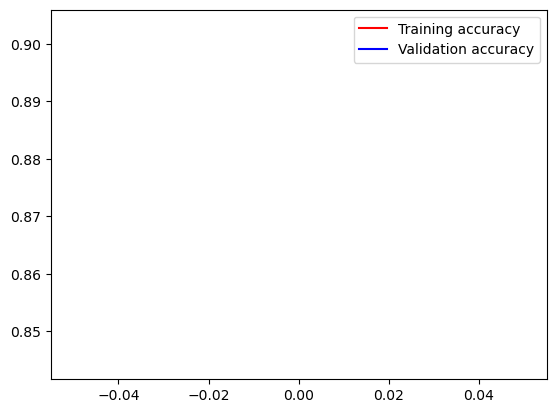

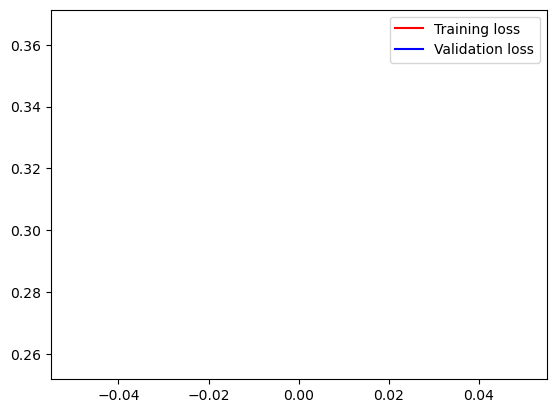

In [8]:
train_model_and_plot(model, train_gen, val_gen, 1)

In [9]:
# Save the model architecture to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)

# Save mode
# model.save('./model_weights.h5')
model.export("saved_model")
# Save the model weights
# model.save_weights("model_weights.weights.h5")

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  12920405360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12921077824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12921078000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12920404832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12920405712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12921078176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12921078880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12921079232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12920393920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12921079056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12921079760: TensorSpec(shape=(), dtype=tf.resource, name=N

In [2]:
import tensorflow as tf
print(tf.__version__)

2.16.1
